In [1]:
import pandas as pd
df = pd.read_csv('data.csv')
df.dropna(inplace=True)
df.head()

,revenue,reach,local_tv,online,instore,person,event
0,45860.28,2,31694.91,2115,3296,8,non_event
1,63588.23,2,35040.17,1826,2501,14,special
2,23272.69,4,30992.82,1851,2524,6,special
3,45911.23,2,29417.78,2437,3049,12,special
4,36644.23,2,35611.11,1122,1142,13,cobranding


## 特征对销售额的关联性
reach(微信推送次数)与revenue(门店销售额)有负相关的关系，微信推动次数越多，销售额反而越低。
<br>其余变量与销售额都是正相关关系。其中local_tv(本地电视广告投入)和person(门店销售人员投入)与销售额的正相关性较大。

In [2]:
df.corr()['revenue']

revenue     1.000000
reach      -0.165286
local_tv    0.602114
online      0.174198
instore     0.307361
person      0.557475
Name: revenue, dtype: float64

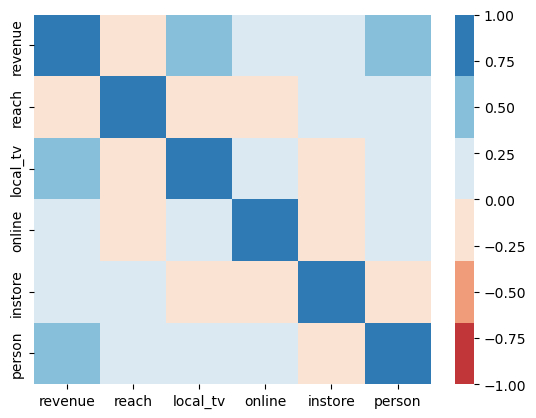

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap=sns.color_palette('RdBu'))
plt.show()

event(门店促销事件)为离散变量，计算其correlation ratio [https://zhuanlan.zhihu.com/p/362258222] 。门店促销事件类型与销售额的关联性低。

In [4]:
import numpy as np
events = df[['event','revenue']]
events_mean = events.groupby(by='event', as_index=False)['revenue'].mean()
events_mean.columns = ['event','group_avg']
events = pd.merge(events, events_mean, on='event', how='left')
events['total_avg'] = df['revenue'].mean()
events['square_diff'] = (events['revenue']-events['total_avg'])**2
events_count = pd.DataFrame(df['event'].value_counts()).reset_index()
events_count.columns = ['event','count']
events_sum = events_count.merge(events_mean, on='event', how='inner')
events_sum['total_avg'] = df['revenue'].mean()
numerator = 0
for i in range(len(events_sum)):
    numerator += events_sum['count'][i]*(events_sum['group_avg'][i]-events_sum['total_avg'][i])**2
np.sqrt(numerator/sum(events['square_diff']))

0.04368009601916971

In [5]:
import altair as alt
alt.Chart(events, width=300).mark_boxplot(
).encode(
    x = 'event', y ='revenue'
)

alt.Chart(...)

## 特征筛选
DictVectorizer结果为9个特征都应该保留

In [6]:
X = df.drop('revenue', axis=1)
y = df['revenue']
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
X = vec.fit_transform(X.to_dict(orient='record'))
len(vec.feature_names_), vec.feature_names_

C:\Users\hejin\AppData\Local\Temp\ipykernel_8024\2935854735.py:5: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  X = vec.fit_transform(X.to_dict(orient='record'))


(9,
 ['event=cobranding',
  'event=holiday',
  'event=non_event',
  'event=special',
  'instore',
  'local_tv',
  'online',
  'person',
  'reach'])

使用SelectKBest保留最主要的4个特征。结果显示最主要的四个特征为local_tv(本地电视广告投入)、online(线上广告投入)、person(门店销售人员投入)、和reach(微信推送次数)。

In [7]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=4)
selector.fit(X,y)
X_new = selector.transform(X)
X_new = pd.DataFrame(X_new.toarray())
X_new

C:\Users\hejin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


,0,1,2,3
0,31694.91,2115.0,8.0,2.0
1,35040.17,1826.0,14.0,2.0
2,30992.82,1851.0,6.0,4.0
3,29417.78,2437.0,12.0,2.0
4,35611.11,1122.0,13.0,2.0
...,...,...,...,...
924,30527.57,1407.0,12.0,3.0
925,31233.04,1849.0,18.0,2.0
926,34346.13,1200.0,8.0,3.0
927,30215.90,1532.0,16.0,3.0


In [8]:
X_new.columns = ['local_tv','online','person','reach']

## 随机森林

## SVM

## xgboost

## ANN